# TASK 1


Convolutional neural networks have been really popular in different domains like Images, Time
series etc. Use the ‘ChlorineConcentration’ dataset from the attachment and design a classifier
using CNN. The training and test samples ratio should be 70% and 30% respectively. The
minimum expected test accuracy is 90%.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA

In [2]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split

from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [3]:
# Retrieving the Dataset onto a pandas dataframe
filename = 'ChlorineConcentration' 
data = pd.read_csv(filename, header = None, delimiter = ",", index_col = False)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,2,1.4682,4.1208,3.6959,3.4915,2.9480,2.7986,2.2477,1.7425,-0.49291,...,0.19750,2.07350,1.360300,-0.25118,0.885280,-0.490750,-0.64965,-0.87594,-0.64017,-0.72720
1,2,4.3120,4.1491,3.7562,3.6419,3.1497,3.0162,2.6206,2.2513,1.72710,...,-0.15069,0.98590,0.464110,0.25694,0.282000,-0.097757,-0.32864,-0.72664,-0.36264,-0.43619
2,1,-3.7883,6.4407,5.1232,2.5096,3.3153,3.8406,2.1552,3.8766,0.55248,...,-0.22846,-0.32982,-0.224710,-0.22838,-0.234030,-0.228380,-0.22839,-0.22838,-0.22838,-0.22838
3,3,2.9490,3.3273,2.9524,2.8522,2.4667,2.4092,2.1532,1.9940,1.65710,...,-0.46454,1.41400,-0.024253,-0.17260,-0.205170,-0.429010,-0.56181,-0.90639,-0.57992,-0.66727
4,2,1.3853,3.6172,3.2082,3.0444,2.6086,2.5178,2.2109,1.9498,1.16690,...,-0.26982,1.78760,0.238090,-0.11554,0.016351,-0.394990,-0.54357,-0.85518,-0.55554,-0.63255


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,2.301823,3.013966,4.049332,3.512155,3.364203,2.811531,2.674740,2.241005,1.901925,0.771041,...,-0.043784,1.538252,0.751484,0.022108,0.462262,-0.298354,-0.527662,-0.812766,-0.557154,-0.632755
std,0.819975,1.747689,0.979493,0.726274,0.619561,0.482094,0.458764,0.324536,0.392721,0.945197,...,0.327525,0.460130,0.662886,0.355566,0.552594,0.265223,0.179027,0.170868,0.161931,0.163101
min,1.000000,-12.419000,-8.402200,-6.372400,-3.939000,-2.908500,-3.326600,-1.119700,-2.636200,-1.101300,...,-0.623020,-0.373720,-0.610600,-0.843850,-0.564290,-0.844940,-0.965190,-1.132500,-0.966880,-1.040900
25%,2.000000,1.545000,3.515125,3.129350,2.999075,2.582875,2.505450,2.177625,1.753425,-0.115093,...,-0.347735,1.228600,0.131170,-0.236073,-0.054556,-0.499415,-0.643782,-0.922122,-0.650800,-0.732205
50%,3.000000,3.231000,4.006350,3.592750,3.408850,2.891650,2.767800,2.258400,1.915600,1.157400,...,-0.106530,1.491250,0.621965,-0.013201,0.339305,-0.313520,-0.519015,-0.821170,-0.548835,-0.623780
75%,3.000000,4.148500,4.479600,3.899100,3.721025,3.095100,2.899825,2.349650,2.115725,1.593000,...,0.266312,1.953700,1.379525,0.281460,0.985272,-0.088152,-0.403338,-0.708720,-0.451408,-0.524295
max,3.000000,12.633000,7.524300,5.565100,5.156500,4.033800,3.840600,2.932600,3.876600,2.098700,...,0.615250,2.256800,1.952500,0.896870,1.505000,0.306470,0.195110,0.195110,0.195110,0.195110


In [6]:
# Normalization of the Dataset
scalar = MinMaxScaler()
features = scalar.fit_transform(data.iloc[:,1:167].values)

## Fundamental Analysis using PCA

In [7]:
pca = PCA(n_components=3)
PCs= pca.fit_transform(features)
d = {'PC1': PCs[:,0], 'PC2': PCs[:,1], 'PC3': PCs[:,2], 'Label': data[0]}
PC_Df = pd.DataFrame(data = d)

In [8]:
PC_Df.head()

,PC1,PC2,PC3,Label
0,0.695876,-2.335562,0.634903,2
1,-0.655295,2.246137,0.102123,2
2,1.343061,2.329942,0.628292,1
3,-2.562263,0.158885,-0.000040,3
4,-2.247420,-0.413365,0.927342,2


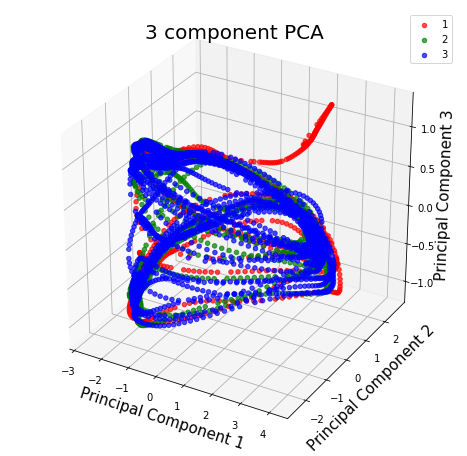

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = PC_Df['Label'] == target
    ax.scatter(PC_Df.loc[indicesToKeep, 'PC1']
               , PC_Df.loc[indicesToKeep, 'PC2']
               , PC_Df.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 20
              , alpha = 0.7)
ax.legend(targets)
ax.grid()

## Note!

The three classes in the above plot seem to be not easily seperable by simpler ML algorithms

In [10]:
# Encoding Class labels [1,2,3] to [0,1,2] suitable for the CNN model
label_encoder = LabelEncoder().fit(data[0])
labels = label_encoder.transform(data[0])
classes = list(label_encoder.classes_)
no_classes = len(classes)
print("The Data contains {} classes".format(no_classes))

The Data contains 3 classes


In [11]:
# read the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)

In [12]:
# Reshape array for Convolutional Layers
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Get input shape
trainsize = X_train.shape[1]

# Convert class arrays to categorical class array
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get ouput shape
out_size = y_train.shape[1]

## Building CNN model with keras

In [13]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    
    # Input Layer
    model.add(Conv1D(filters=64, kernel_size=21, activation='relu', input_shape=(trainsize,1)))
    
    # Hidden Layers
    model.add(Conv1D(filters=64, kernel_size=21, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    # Output Layer
    model.add(Dense(out_size, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

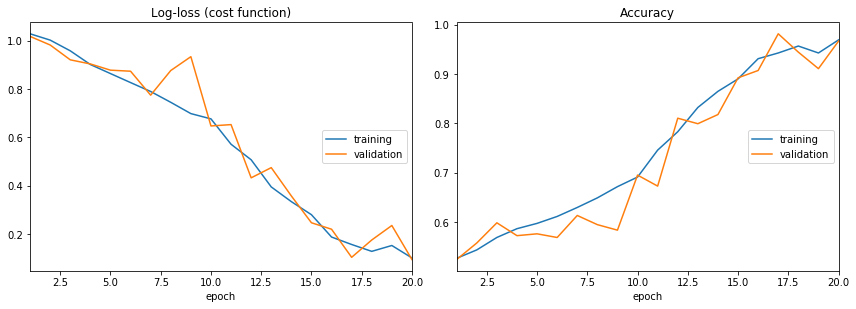

In [14]:
# build the model
model = classification_model()

# Fit model for the Training data
model.fit(X_train, y_train, epochs=20, validation_split=.1, callbacks=[PlotLossesKeras()], verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

In [15]:
# Validation Accuracy
print('Accuracy: {:.2f} % \n Error: {:.2f} %'.format(scores[1]*100, (1 - scores[1])*100))

Accuracy: 97.14 % 
 Error: 2.86 %


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 146, 64)           1408      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 126, 64)           86080     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                258112    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total para

## Checking Model Prediction Accuracy on X_Test

In [17]:
# Predict the classes for X_test
out = model.predict(X_test)

## Convert categorical array 'out' to class_out (class numbers)
categorical_class_out = (out>0.5)*1
categorical_class_out = pd.DataFrame(categorical_class_out)
class_out = categorical_class_out.values.argmax(1)

## Convert categorical array 'y_test' to class_out (class numbers)
y_test = pd.DataFrame(y_test)
real_class = y_test.values.argmax(1)


## Comparing Real classes with predicted classes
Model_prediction_acc = (real_class==class_out)*1
Correct_prediction = np.count_nonzero(Model_prediction_acc)

Accuracy = ((Correct_prediction)/len(Model_prediction_acc))*100
print("Test Accuracy of the Model is {} %".format(Accuracy))

Test Accuracy of the Model is 97.22222222222221 %


## Save Model

In [18]:
model.save('classification_model.h5')